In [75]:
user = "Alex"
pathtorepo = "C:\\Users\\" *user *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\bifurcation\\")

  Activating 

project at `C:\Users\Alex\Desktop\dynamical-systems\env\bifurcation`


In [76]:
using BifurcationKit, HclinicBifurcationKit, Setfield, LinearAlgebra, Plots, Parameters

In [77]:
τ_ = 0.013; τD_ = 0.07993;  τy_ = 3.3; J_ = 3.07; β_ = 0.300
xthr_ = 0.75; ythr_ = 0.4
α_ = 1.58; ΔU0_ = 0.305
I0_ = -1.7064; U0_ = 0.265; 

In [78]:
@inbounds function TM_bk(u, p)
    U(y, p) = p[8] + p[9] / ( 1.0 + exp( -50.0 * (y - p[7]) ) )
    σ(x, p) = 1.0 / ( 1.0 + exp( -20.0 * (x-p[6]) ) )
    g(E, x, y, p, U_) = log( 1.0 + exp( (p[5] * U_ * x * E + p[11]  ) / (p[1]) ) )
    
    U_ = U(u[3], p)
    du1 = (-u[1] + p[1] * g(u[1], u[2], u[3], p, U_) ) / p[2]
    du2 = (1.0 - u[2]) / p[3] - U_*u[2]*u[1]
    du3 = (-u[3])/p[4] + p[10] * σ(u[2], p)
    
    return [du1, du2, du3]
end

TM_bk (generic function with 1 method)

In [79]:
p = (α = α_, τ = τ_, τD = τD_, τy = τy_, J = J_, xthr = xthr_, ythr = ythr_, U0 = U0_, ΔU0 = ΔU0_, β = β_, I0 = I0_)

(α = 1.58, τ = 0.013, τD = 0.07993, τy = 3.3, J = 3.07, xthr = 0.75, ythr = 0.4, U0 = 0.265, ΔU0 = 0.305, β = 0.3, I0 = -1.7064)

In [80]:
fp0 = [ 8.34581,  0.738495,  0.438299];

In [81]:
prob =  BifurcationProblem(TM_bk, fp0, p, (@lens _.I0))

┌─ Bifurcation Problem with uType Vector{Float64}
├─ Inplace:  false
├─ Symmetric: false
└─ Parameter: I0

In [82]:
opt_new = NewtonPar(maxIter = 50, tol = 1e-6) # maxIter = 3
pmax, pmin = 0.0, -1.74

(0.0, -1.74)

In [83]:
opts_con = ContinuationPar(pMin = pmin, pMax = pmax,
                            ds = 0.001, dsmin = 1e-5, dsmax = 0.1,
                            nev = 3, detectBifurcation = 3, newtonOptions  = opt_new,
                            maxSteps  = 300)

ContinuationPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  dsmin: Float64 1.0e-5
  dsmax: Float64 0.1
  ds: Float64 0.001
  a: Float64 0.5
  pMin: Float64 -1.74
  pMax: Float64 0.0
  maxSteps: Int64 300
  newtonOptions: NewtonPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  η: Float64 150.0
  saveToFile: Bool false
  saveSolEveryStep: Int64 1
  nev: Int64 3
  saveEigEveryStep: Int64 1
  saveEigenvectors: Bool true
  plotEveryStep: Int64 10
  tolStability: Float64 1.0e-10
  detectFold: Bool true
  detectBifurcation: Int64 3
  dsminBisection: Float64 1.0e-16
  nInversion: Int64 2
  maxBisectionSteps: Int64 15
  tolBisectionEigenvalue: Float64 1.0e-16
  detectEvent: Int64 0
  tolParamBisectionEvent: Float64 1.0e-16
  detectLoop: Bool false


In [84]:
opt_new

NewtonPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  tol: Float64 1.0e-6
  maxIter: Int64 50
  verbose: Bool false
  linsolver: DefaultLS
  eigsolver: DefaultEig{typeof(real)}
  linesearch: Bool false
  α: Float64 1.0
  αmin: Float64 0.001


In [85]:
br = continuation(prob, PALC(), opts_con)

 ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 26
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter I0 starts at -1.7064, ends at 0.0
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1,     hopf at I0 ≈ -1.10635734 ∈ (-1.11004183, -1.10635734), |δp|=4e-03, [converged], δ = (-2, -2), step =  15, eigenelements in eig[ 16], ind_ev =   2
- #  2, endpoint at I0 ≈ +0.00000000,                                                                     step =  25


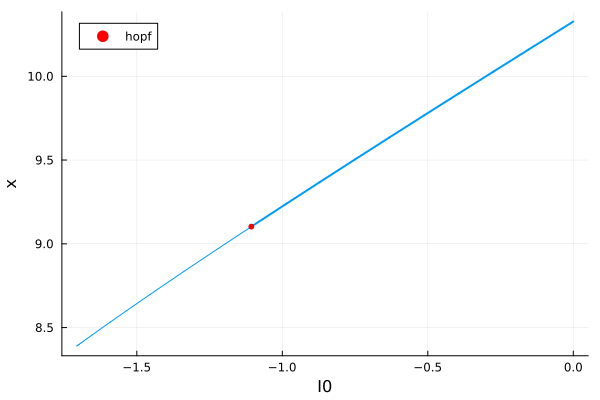

In [86]:
plot(br)

In [87]:
hp_codim2_1 = continuation(br, 1, (@lens _.U0),
	ContinuationPar(opts_con, pMin = 0.0, pMax = 0.7,
		ds = 0.001, dsmax = 0.1, dsmin = 1e-5),
	# detection of codim 2 bifurcations with bisection
	detectCodim2Bifurcation = 2,
	# tell to start the Hopf problem using eigen elements: compute left eigenvector
	startWithEigen = true,
	# we update the Hopf problem at every continuation step
	updateMinAugEveryStep = 1,
	# compute both sides of the initial condition
	bothside = true,
    verbosity = 3
	)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
────────────────── PALC ──────────────────

━━━━━━━━━━━━━━━━━━  INITIAL GUESS   ━━━━━━━━━━━━━━━━━━
──▶ convergence of initial guess = OK

──▶ parameter = 0.265, initial step

━━━━━━━━━━━━━━━━━━ INITIAL TANGENT  ━━━━━━━━━━━━━━━━━━


──▶ convergence of the initial guess = OK

──▶ parameter = 0.26500666666666667, initial step (bis)
Predictor:  Secant


───────────────────────────────────────────────────────
Continuation Step 0 
Step size = 1.0000e-03
Parameter U0 = 2.6500e-01 ⟶  2.6508e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.6500e-01 ⟶  2.6493e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.202096946888553, -0.1554388033712808, 0)
              ──> (16.198723392378067, -0.1555226588395318, 0)
───────────────────────────────────────────────────────
Continuation Step 1 
Step size = 1.4608e-03
Parameter U0 = 2.6493e-01 ⟶  2.6483e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 2.6493e-01 ⟶  2.6482e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.198723392378067, -0.1555226588395318, 0)
              ──> (16.19429113665958, -0.15564185613204834, 0)
───────────────────────────────────────────────────────
Continuation Step 2 
Step size = 2.1623e-03
Parameter U0 = 2.6482e-0

Step size = 1.0000e-01
Parameter U0 = 2.3740e-01 ⟶  2.3475e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.3740e-01 ⟶  2.3519e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (14.309902077166152, -0.22191622307673994, 0)
              ──> (14.003706884188851, -0.23611601501213145, 0)
───────────────────────────────────────────────────────
Continuation Step 17 
Step size = 1.0000e-01
Parameter U0 = 2.3519e-01 ⟶  2.3297e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.3519e-01 ⟶  2.3334e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (14.003706884188851, -0.23611601501213145, 0)
              ──> (13.697208517641961, -0.25120522595102457, 0)
───────────────────────────────────────────────────────
Continuation Step 18 
Step size = 1.0000e-01
Parameter U0 = 2.3334e-01 ⟶  2.3150e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)


───────────────────────────────────────────────────────
Continuation Step 28 
Step size = 1.0000e-01
Parameter U0 = 2.2401e-01 ⟶  2.2283e-01 [guess]
──> Step Converged in 3 Nonlinear Iteration(s)
Parameter U0 = 2.2401e-01 ⟶  2.2238e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (10.631113871039735, -0.18231940791796356, 0)
              ──> (10.330602993670388, -0.0550385711008784, 0)
───────────────────────────────────────────────────────
Continuation Step 29 
Step size = 1.0000e-01
Parameter U0 = 2.2238e-01 ⟶  2.2075e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.2238e-01 ⟶  2.2027e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (10.330602993670388, -0.0550385711008784, 0)
              ──> (10.03413358676562, 0.08963461080601076, 0)
──> Event detected before p = 0.22026544859603753
────> Entering [Event], indicator of 2 last events = ((2, 0), (1, 0))
──

Excessive output truncated after 524317 bytes.

──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (9.613971902722485, 0.2417701938889818, 0)
              ──> (9.323524069148817, 0.2965518942004052, 0)
───────────────────────────────────────────────────────
Continuation Step 33 
Step size = 1.0000e-01
Parameter U0 = 2.1402e-01 ⟶  2.1139e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 2.1402e-01 ⟶  2.1141e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (9.323524069148817, 0.2965518942004052, 0)
              ──> (9.033152740642507, 0.3275098633661515, 0)
───────────────────────────────────────────────────────
Continuation Step 34 
Step size = 1.0000e-01
Parameter U0 = 2.1141e-01 ⟶  2.0880e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.1141e-01 ⟶  2.0888e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (9.033152740642507, 0.3275098633661

 ┌─ Curve type: HopfCont
 ├─ Number of points: 130
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter U0 starts at 0.17988800386917658, ends at 0.17988687818335328
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1, endpoint at U0 ≈ +0.17988800,                                                                     step =   0
- #  2,       bt at U0 ≈ +0.17988800 ∈ (+0.17988664, +0.17988800), |δp|=1e-06, [converged], δ = ( 0,  0), step =   0, eigenelements in eig[  1], ind_ev =   0
- #  3,       gh at U0 ≈ +0.22151127 ∈ (+0.22151127, +0.22164099), |δp|=1e-04, [converged], δ = ( 0,  0), step =  34, eigenelements in eig[ 35], ind_ev =   0
- #  4,       gh at U0 ≈ +0.22150883 ∈ (+0.22150883, +0.22163859), |δp|=1e-04, [converged], δ = ( 0,  0), step =  95, eigenelements in eig[ 96], ind_ev =   0
- #  5,       bt at U0 ≈ +0.17988688 ∈ (+0.17988664, +0.17988688), |δp|=2e-07, [converged],

In [88]:
hp_codim2_1

 ┌─ Curve type: HopfCont
 ├─ Number of points: 130
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter U0 starts at 0.17988800386917658, ends at 0.17988687818335328
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1, endpoint at U0 ≈ +0.17988800,                                                                     step =   0
- #  2,       bt at U0 ≈ +0.17988800 ∈ (+0.17988664, +0.17988800), |δp|=1e-06, [converged], δ = ( 0,  0), step =   0, eigenelements in eig[  1], ind_ev =   0
- #  3,       gh at U0 ≈ +0.22151127 ∈ (+0.22151127, +0.22164099), |δp|=1e-04, [converged], δ = ( 0,  0), step =  34, eigenelements in eig[ 35], ind_ev =   0
- #  4,       gh at U0 ≈ +0.22150883 ∈ (+0.22150883, +0.22163859), |δp|=1e-04, [converged], δ = ( 0,  0), step =  95, eigenelements in eig[ 96], ind_ev =   0
- #  5,       bt at U0 ≈ +0.17988688 ∈ (+0.17988664, +0.17988688), |δp|=2e-07, [converged],

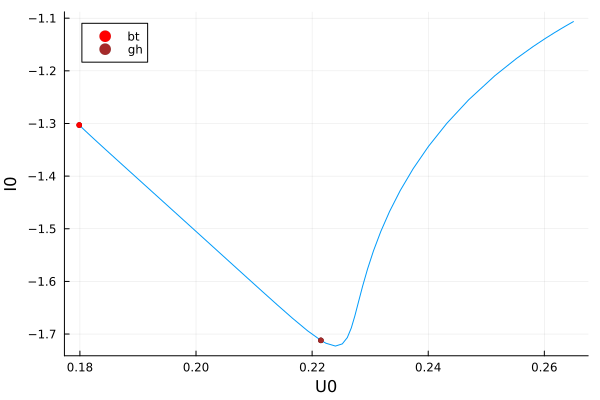

In [89]:
plot(hp_codim2_1)

In [90]:
btpt = getNormalForm(hp_codim2_1, 2; nev = 3, autodiff = false)

Bogdanov-Takens bifurcation point at (:I0, :U0) ≈ (-1.3029948522635861, 0.17988800386917658).
Normal form (B, β1 + β2⋅B + b⋅A⋅B + a⋅A²)
Normal form coefficients:
 a = -21.334935569326404
 b = -0.8689096779664269

You can call various predictors:
 - predictor(::BogdanovTakens, ::Val{:HopfCurve}, ds)
 - predictor(::BogdanovTakens, ::Val{:FoldCurve}, ds)
 - predictor(::BogdanovTakens, ::Val{:HomoclinicCurve}, ds)


In [91]:
br_hom_c = continuation(
		prob,
		btpt,
		# we use mesh adaptation
		PeriodicOrbitOCollProblem(50, 3; meshadapt = true, K = 100),
		PALC(tangent = Bordered()),
		setproperties(opts_con, maxSteps = 8, saveSolEveryStep = 1, dsmax = 1e-2, plotEveryStep = 1, pMin = -1.01, pMax = 1.0, ds = 0.01, detectEvent = 2, detectBifurcation = 0);
verbosity = 1,
ϵ0 = 1e-4, amplitude = 2e-3,
freeparams = ((@lens _.ϵ0), (@lens _.ϵ1)),
updateEveryStep = 4,
)

ArgumentError: ArgumentError: matrix contains Infs or NaNs